In [24]:
import pandas as pd
import numpy as np
import os
os.chdir(r"C:\Users\JAYANT\Desktop\python_240624\Finger_tips_project\Project9_Insurance_prem_linear-regresssion")
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.float_format",lambda x: " %.3f" %x)

In [25]:
pwd


'C:\\Users\\JAYANT\\Desktop\\python_240624\\Finger_tips_project\\Project9_Insurance_prem_linear-regresssion'

In [26]:
data=pd.read_csv(r"ML Project - Linear Regression Insurance Prediction 16955515670.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
cat_col=data.select_dtypes(include="object")
num_col=data.select_dtypes(exclude="object")

In [30]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()

In [31]:
num_col.describe()

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


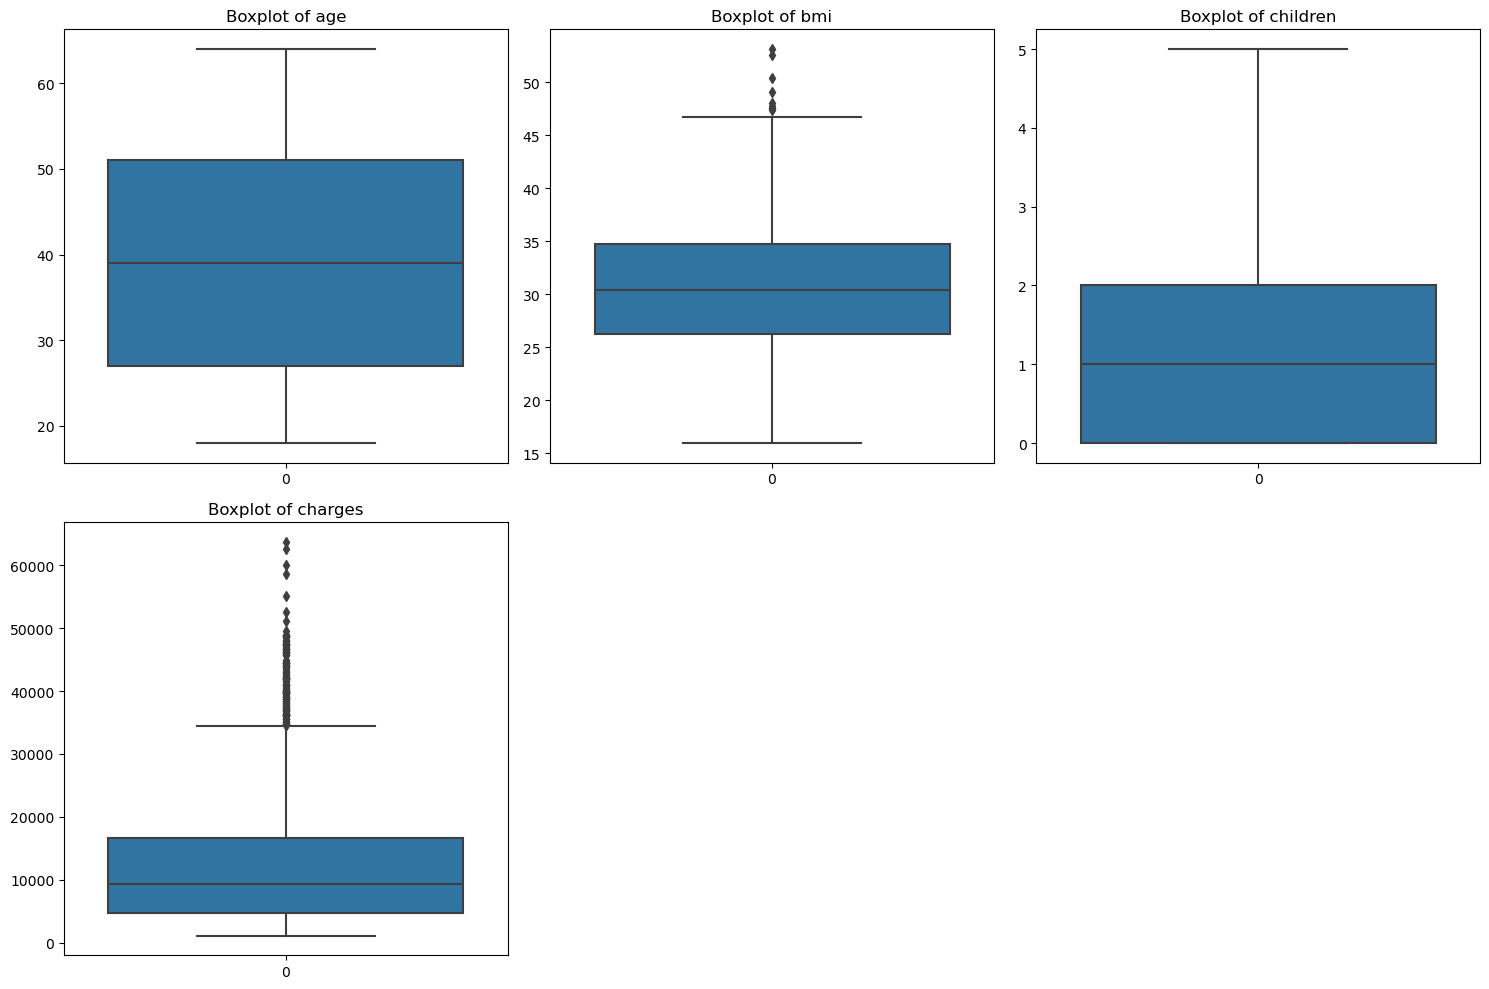

In [32]:
n_cols=3
n_rows=int(np.ceil(len(num_col.columns)/n_cols))
#print(n_rows)

fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,10))
axes=axes.flatten()

## plot boxplot in subplots
for i,col in enumerate(num_col.columns):
    sns.boxplot(num_col[col],ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    
## removing unwanted subplots
for i in range(len(num_col.columns),len(axes)):
    plt.delaxes(axes[i]) ## remove that subplots
    
plt.tight_layout()
plt.show()
    

In [33]:
### outlier treatment

def outlier_treatment(data,columns):
    
    for col in columns:
        
        feature=data[col]
        q1=feature.quantile(0.25)
        q3=feature.quantile(0.75)
        IQR=q3-q1
        
        lower_lim=float(q1- (1.5*IQR))
        upper_lim=float(q3 + (1.5*IQR))
        
        data[col]=np.where(data[col] < lower_lim, lower_lim,data[col])
        data[col]=np.where(data[col] > upper_lim,upper_lim,data[col])
        
    return data    
num_col=outlier_treatment(num_col,num_col.columns)       

In [34]:
num_col=outlier_treatment(num_col,["charges"])

<Axes: >

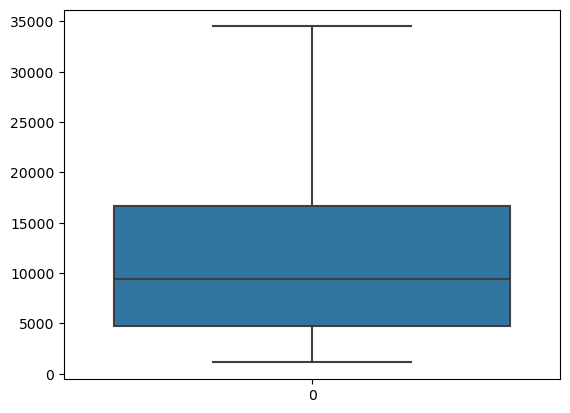

In [35]:
sns.boxplot(num_col["charges"])

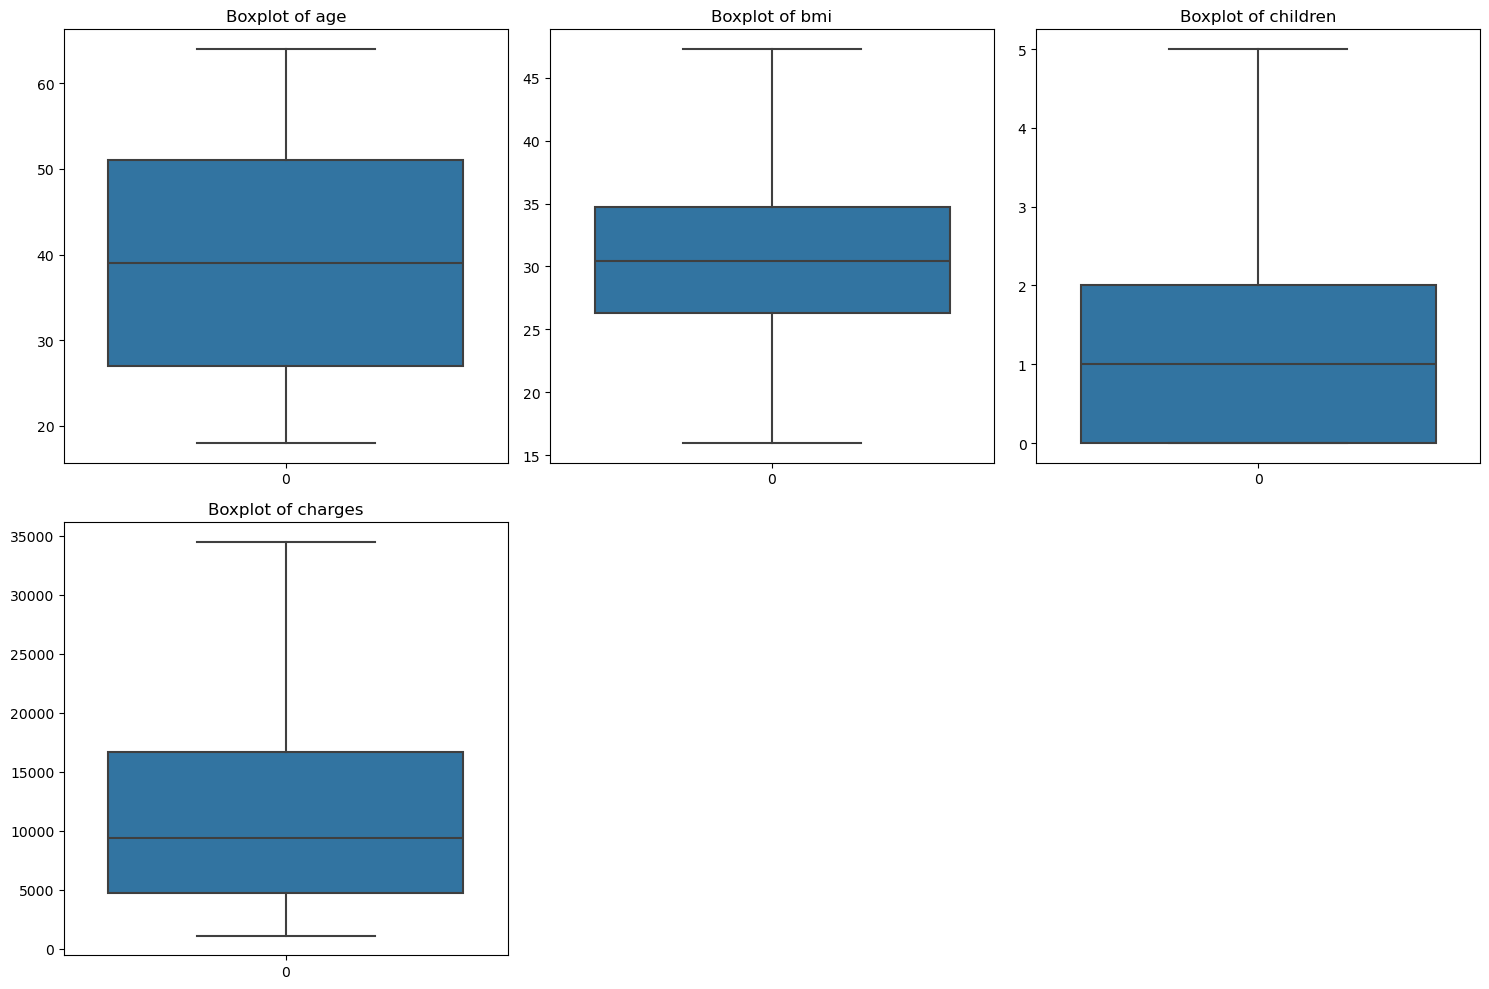

In [36]:
n_cols=3
n_rows=int(np.ceil(len(num_col.columns)/n_cols))
#print(n_rows)

fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,10))
axes=axes.flatten()

## plot boxplot in subplots
for i,col in enumerate(num_col.columns):
    sns.boxplot(num_col[col],ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    
## removing unwanted subplots
for i in range(len(num_col.columns),len(axes)):
    plt.delaxes(axes[i]) ## remove that subplots
    
plt.tight_layout()
plt.show()

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_col=num_col.apply(sc.fit_transform)
num_col

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for col in num_col.columns:
    num_col[col]=sc.fit_transform(num_col[[col]])
num_col    

,age,bmi,children,charges
0,-1.439,-0.454,-0.909,0.434
1,-1.510,0.515,-0.079,-1.059
2,-0.798,0.388,1.581,-0.791
3,-0.442,-1.312,-0.909,0.936
4,-0.513,-0.292,-0.909,-0.848
...,...,...,...,...
1333,0.768,0.053,1.581,-0.185
1334,-1.510,0.210,-0.909,-1.012
1335,-1.510,1.024,-0.909,-1.068
1336,-1.296,-0.801,-0.909,-1.031


In [38]:
num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   float64
 3   charges   1338 non-null   float64
dtypes: float64(4)
memory usage: 41.9 KB


In [39]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
#cat_col=cat_col.apply(enc.fit_transform)
cat_col=pd.get_dummies(cat_col,drop_first=True).astype(int)

In [40]:
cat_col

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [41]:
data=pd.concat((num_col,cat_col),axis=1)

In [42]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.439,-0.454,-0.909,0.434,0,1,0,0,1
1,-1.510,0.515,-0.079,-1.059,1,0,0,1,0
2,-0.798,0.388,1.581,-0.791,1,0,0,1,0
3,-0.442,-1.312,-0.909,0.936,1,0,1,0,0
4,-0.513,-0.292,-0.909,-0.848,1,0,1,0,0


In [44]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

x=data.drop("charges",axis=1)
y=data["charges"]

x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=42)
x_train.shape

(1070, 8)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
import xgboost as xg
import catboost as cb


In [46]:
lis=[LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor,KNeighborsRegressor,xg.XGBRegressor,cb.CatBoostRegressor]

In [47]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [48]:
output_result={
    "MODEL":[],
    "TRAIN SCORE":[],
    "TEST SCORE":[],
    "MAE":[],
    "MSE":[],
    "RMSE":[],
    "R2 SCORE":[]
}

In [49]:
for model_class in lis:
    model=model_class()
    name=model_class.__name__
    output_result["MODEL"].append(name)
    print(f"Model Name:->{name}")
    
    model.fit(x_train,y_train)
    
    train_acc=model.score(x_train,y_train)
    output_result["TRAIN SCORE"].append(train_acc)
    print(f"Train Accuracy: {train_acc}")
    
    test_acc=model.score(x_test,y_test)
    output_result["TEST SCORE"].append(test_acc)
    print(f"Test Accuracy: {test_acc}")
    
    y_pred=model.predict(x_test)
    
    MAE=mean_absolute_error(y_test,y_pred)
    output_result["MAE"].append(MAE)
    print(f"MEA is {MAE}")
    
    MSE=mean_squared_error(y_test,y_pred)
    output_result["MSE"].append(MSE)
    print(f"MSE IS {MSE}")
    
    RMSE=np.sqrt(MSE)
    output_result["RMSE"].append(RMSE)
    print(f"RMSE IS {RMSE}")
    
    R2=r2_score(y_test,y_pred)
    output_result["R2 SCORE"].append(R2)
    print(f"R2 SCORE IS {R2}")
    
    print("\n\n")
    
output_result=pd.DataFrame(output_result)
output_result

Model Name:->LinearRegression
Train Accuracy: 0.7376387881253277
Test Accuracy: 0.7841002156994548
MEA is 0.3266346071548245
MSE IS 0.22730636445692912
RMSE IS 0.4767665722939572
R2 SCORE IS 0.7841002156994548



Model Name:->SVR
Train Accuracy: 0.8164282666954829
Test Accuracy: 0.834702517349588
MEA is 0.2061162385455492
MSE IS 0.17403060386036973
RMSE IS 0.41716975424923813
R2 SCORE IS 0.834702517349588



Model Name:->DecisionTreeRegressor
Train Accuracy: 0.9975985807039203
Test Accuracy: 0.6986750939934618
MEA is 0.25421511151668885
MSE IS 0.3172447305891037
RMSE IS 0.563244822958102
R2 SCORE IS 0.6986750939934618



Model Name:->RandomForestRegressor
Train Accuracy: 0.9695801963148256
Test Accuracy: 0.8324500507229945
MEA is 0.2223835669798704
MSE IS 0.17640207450176137
RMSE IS 0.42000246963769317
R2 SCORE IS 0.8324500507229945



Model Name:->GradientBoostingRegressor
Train Accuracy: 0.8680651286297937
Test Accuracy: 0.8472228527217387
MEA is 0.21390451699254034
MSE IS 0.16084878

164:	learn: 0.3805084	total: 720ms	remaining: 3.65s
165:	learn: 0.3802969	total: 724ms	remaining: 3.64s
166:	learn: 0.3800124	total: 728ms	remaining: 3.63s
167:	learn: 0.3797543	total: 734ms	remaining: 3.64s
168:	learn: 0.3795426	total: 737ms	remaining: 3.63s
169:	learn: 0.3793420	total: 741ms	remaining: 3.62s
170:	learn: 0.3791828	total: 744ms	remaining: 3.6s
171:	learn: 0.3789986	total: 750ms	remaining: 3.61s
172:	learn: 0.3788482	total: 754ms	remaining: 3.6s
173:	learn: 0.3786315	total: 757ms	remaining: 3.59s
174:	learn: 0.3785048	total: 760ms	remaining: 3.58s
175:	learn: 0.3781095	total: 765ms	remaining: 3.58s
176:	learn: 0.3778053	total: 768ms	remaining: 3.57s
177:	learn: 0.3774868	total: 771ms	remaining: 3.56s
178:	learn: 0.3773907	total: 774ms	remaining: 3.55s
179:	learn: 0.3770158	total: 779ms	remaining: 3.55s
180:	learn: 0.3764957	total: 783ms	remaining: 3.54s
181:	learn: 0.3763156	total: 786ms	remaining: 3.53s
182:	learn: 0.3762046	total: 789ms	remaining: 3.52s
183:	learn: 0.

368:	learn: 0.3387225	total: 1.5s	remaining: 2.57s
369:	learn: 0.3385666	total: 1.51s	remaining: 2.57s
370:	learn: 0.3384240	total: 1.51s	remaining: 2.56s
371:	learn: 0.3383860	total: 1.52s	remaining: 2.56s
372:	learn: 0.3381539	total: 1.52s	remaining: 2.56s
373:	learn: 0.3379794	total: 1.53s	remaining: 2.56s
374:	learn: 0.3377897	total: 1.54s	remaining: 2.58s
375:	learn: 0.3373333	total: 1.55s	remaining: 2.58s
376:	learn: 0.3370506	total: 1.56s	remaining: 2.57s
377:	learn: 0.3370028	total: 1.56s	remaining: 2.56s
378:	learn: 0.3369485	total: 1.56s	remaining: 2.56s
379:	learn: 0.3366408	total: 1.57s	remaining: 2.56s
380:	learn: 0.3364648	total: 1.57s	remaining: 2.55s
381:	learn: 0.3364189	total: 1.57s	remaining: 2.55s
382:	learn: 0.3362434	total: 1.58s	remaining: 2.54s
383:	learn: 0.3360998	total: 1.58s	remaining: 2.54s
384:	learn: 0.3360052	total: 1.59s	remaining: 2.54s
385:	learn: 0.3359460	total: 1.59s	remaining: 2.54s
386:	learn: 0.3359048	total: 1.6s	remaining: 2.53s
387:	learn: 0.

545:	learn: 0.3088942	total: 2.23s	remaining: 1.85s
546:	learn: 0.3086553	total: 2.24s	remaining: 1.85s
547:	learn: 0.3086306	total: 2.24s	remaining: 1.85s
548:	learn: 0.3084504	total: 2.24s	remaining: 1.84s
549:	learn: 0.3083339	total: 2.25s	remaining: 1.84s
550:	learn: 0.3081680	total: 2.25s	remaining: 1.84s
551:	learn: 0.3079266	total: 2.26s	remaining: 1.83s
552:	learn: 0.3078294	total: 2.26s	remaining: 1.83s
553:	learn: 0.3076646	total: 2.27s	remaining: 1.83s
554:	learn: 0.3074979	total: 2.27s	remaining: 1.82s
555:	learn: 0.3073315	total: 2.27s	remaining: 1.82s
556:	learn: 0.3071887	total: 2.29s	remaining: 1.82s
557:	learn: 0.3070680	total: 2.29s	remaining: 1.81s
558:	learn: 0.3068392	total: 2.29s	remaining: 1.81s
559:	learn: 0.3065942	total: 2.3s	remaining: 1.81s
560:	learn: 0.3064559	total: 2.31s	remaining: 1.8s
561:	learn: 0.3062998	total: 2.31s	remaining: 1.8s
562:	learn: 0.3061235	total: 2.32s	remaining: 1.8s
563:	learn: 0.3059719	total: 2.32s	remaining: 1.79s
564:	learn: 0.30

716:	learn: 0.2862952	total: 3s	remaining: 1.19s
717:	learn: 0.2862039	total: 3.01s	remaining: 1.18s
718:	learn: 0.2860886	total: 3.02s	remaining: 1.18s
719:	learn: 0.2858384	total: 3.02s	remaining: 1.17s
720:	learn: 0.2857942	total: 3.02s	remaining: 1.17s
721:	learn: 0.2857435	total: 3.03s	remaining: 1.17s
722:	learn: 0.2855971	total: 3.03s	remaining: 1.16s
723:	learn: 0.2854780	total: 3.04s	remaining: 1.16s
724:	learn: 0.2852885	total: 3.04s	remaining: 1.16s
725:	learn: 0.2851610	total: 3.05s	remaining: 1.15s
726:	learn: 0.2850392	total: 3.05s	remaining: 1.15s
727:	learn: 0.2849829	total: 3.06s	remaining: 1.14s
728:	learn: 0.2848737	total: 3.06s	remaining: 1.14s
729:	learn: 0.2848443	total: 3.07s	remaining: 1.13s
730:	learn: 0.2846883	total: 3.07s	remaining: 1.13s
731:	learn: 0.2846243	total: 3.08s	remaining: 1.13s
732:	learn: 0.2845215	total: 3.08s	remaining: 1.12s
733:	learn: 0.2844480	total: 3.08s	remaining: 1.12s
734:	learn: 0.2842694	total: 3.09s	remaining: 1.11s
735:	learn: 0.2

883:	learn: 0.2677134	total: 3.78s	remaining: 496ms
884:	learn: 0.2675418	total: 3.79s	remaining: 492ms
885:	learn: 0.2673408	total: 3.79s	remaining: 488ms
886:	learn: 0.2671472	total: 3.79s	remaining: 483ms
887:	learn: 0.2671096	total: 3.8s	remaining: 479ms
888:	learn: 0.2669737	total: 3.8s	remaining: 475ms
889:	learn: 0.2669544	total: 3.81s	remaining: 471ms
890:	learn: 0.2667877	total: 3.81s	remaining: 466ms
891:	learn: 0.2667746	total: 3.81s	remaining: 462ms
892:	learn: 0.2665978	total: 3.82s	remaining: 457ms
893:	learn: 0.2665591	total: 3.82s	remaining: 453ms
894:	learn: 0.2664496	total: 3.83s	remaining: 449ms
895:	learn: 0.2663158	total: 3.83s	remaining: 444ms
896:	learn: 0.2663086	total: 3.83s	remaining: 440ms
897:	learn: 0.2662596	total: 3.84s	remaining: 436ms
898:	learn: 0.2661655	total: 3.84s	remaining: 431ms
899:	learn: 0.2660047	total: 3.84s	remaining: 427ms
900:	learn: 0.2658479	total: 3.85s	remaining: 423ms
901:	learn: 0.2657765	total: 3.85s	remaining: 418ms
902:	learn: 0.

,MODEL,TRAIN SCORE,TEST SCORE,MAE,MSE,RMSE,R2 SCORE
0,LinearRegression,0.738,0.784,0.327,0.227,0.477,0.784
1,SVR,0.816,0.835,0.206,0.174,0.417,0.835
2,DecisionTreeRegressor,0.998,0.699,0.254,0.317,0.563,0.699
3,RandomForestRegressor,0.970,0.832,0.222,0.176,0.420,0.832
4,GradientBoostingRegressor,0.868,0.847,0.214,0.161,0.401,0.847
5,KNeighborsRegressor,0.789,0.700,0.345,0.316,0.562,0.700
6,XGBRegressor,0.993,0.803,0.248,0.207,0.455,0.803
7,CatBoostRegressor,0.933,0.834,0.231,0.175,0.418,0.834
